<a href="https://colab.research.google.com/github/Obreintelly/KNN_NB_Implementation/blob/main/KNN_NB_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Pandas library
import pandas as pd

#Importing Numpy Library
import numpy as np

#Importing Matplotlib Library

import matplotlib.pyplot as plt

#Importing Seaborn Library

import seaborn as sns

sns.set_theme()

#sns.set_palette('bright')


#Importing Scipy
import scipy
#Importing SKLearn
import sklearn

import warnings
warnings.filterwarnings("ignore")



# **3. Loading the Dataset**

In [2]:
#Checking Out dataset documentation
with open('/content/spambase.DOCUMENTATION') as f:
    print(f.read())

1. Title:  SPAM E-mail Database

2. Sources:
   (a) Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt
        Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304
   (b) Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835
   (c) Generated: June-July 1999

3. Past Usage:
   (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.
   (b) Determine whether a given email is spam or not.
   (c) ~7% misclassification error.
       False positives (marking good mail as spam) are very undesirable.
       If we insist on zero false positives in the training/testing set,
       20-25% of the spam passed through the filter.

4. Relevant Information:
        The "spam" concept is diverse: advertisements for products/web
        sites, make money fast schemes, chain letters, pornography...
	Our collection of spam e-mails came from our postmaster and 
	individuals who had filed spam.  Our collection of non-spam 
	e-mails came from filed work a

In [3]:
#We know from the documentation that the last column is class indicating whether 
#an email is a spam or not. 

In [4]:


df = pd.read_csv('/content/spambase.data')


In [5]:
with open('/content/spambase.names') as f:
    lst = f.read().split('\n')

In [6]:
# We have about 57 names in this dataset. 

# **Previewing the Dataset**

In [7]:
#Checking the first five rows of the data

#One observation is that our columns are numbers
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [8]:
#Checking the last five rows
df.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [9]:
#Displaying the shape of Our Dataset
print('Our Spambase Dataset has {} rows, {} columns'.format(*df.shape))

Our Spambase Dataset has 4600 rows, 58 columns


In [10]:
#Checking Our Columns
df.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

In [11]:
#Checking the Dtypes in Our Dataset
#We only have numerical data (floats and ints)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

# **4. Data Cleaning**

# Accuracy/Validity

In [12]:
#Displaying names in the Spambase names
lst

['| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)',
 '|',
 '| 48 continuous real [0,100] attributes of type word_freq_WORD ',
 '| = percentage of words in the e-mail that match WORD,',
 '| i.e. 100 * (number of times the WORD appears in the e-mail) / ',
 '| total number of words in e-mail.  A "word" in this case is any ',
 '| string of alphanumeric characters bounded by non-alphanumeric ',
 '| characters or end-of-string.',
 '|',
 '| 6 continuous real [0,100] attributes of type char_freq_CHAR',
 '| = percentage of characters in the e-mail that match CHAR,',
 '| i.e. 100 * (number of CHAR occurences) / total characters in e-mail',
 '|',
 '| 1 continuous real [1,...] attribute of type capital_run_length_average',
 '| = average length of uninterrupted sequences of capital letters',
 '|',
 '| 1 continuous integer [1,...] attribute of type capital_run_length_longest',
 '| = length of longest uninterrupted sequence of capital letters',
 '|',
 '| 1 continuous integer [1,...] attribute of

In [13]:
#Deriving Column names
names=(
 'word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 'char_freq_!',
 'char_freq_$',
 'char_freq_#',
 'capital_run_length_average',
 'capital_run_length_longest',
 'capital_run_length_total',
 'class')
 

In [14]:
#Our columns are numbers. We need to change them to a format that would
#make logical sense. To do this, we match them to the names dataset. 

df= pd.read_csv('/content/spambase.data', names=names)

In [15]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [16]:
#Standardizing Our Columns
df.columns=df.columns.str.strip().str.upper().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('[','').str.replace('!','').str.replace('$','').str.replace('#','').str.replace(';','')

In [17]:
df.head()

,WORD_FREQ_MAKE,WORD_FREQ_ADDRESS,WORD_FREQ_ALL,WORD_FREQ_3D,WORD_FREQ_OUR,WORD_FREQ_OVER,WORD_FREQ_REMOVE,WORD_FREQ_INTERNET,WORD_FREQ_ORDER,WORD_FREQ_MAIL,WORD_FREQ_RECEIVE,WORD_FREQ_WILL,WORD_FREQ_PEOPLE,WORD_FREQ_REPORT,WORD_FREQ_ADDRESSES,WORD_FREQ_FREE,WORD_FREQ_BUSINESS,WORD_FREQ_EMAIL,WORD_FREQ_YOU,WORD_FREQ_CREDIT,WORD_FREQ_YOUR,WORD_FREQ_FONT,WORD_FREQ_000,WORD_FREQ_MONEY,WORD_FREQ_HP,WORD_FREQ_HPL,WORD_FREQ_GEORGE,WORD_FREQ_650,WORD_FREQ_LAB,WORD_FREQ_LABS,WORD_FREQ_TELNET,WORD_FREQ_857,WORD_FREQ_DATA,WORD_FREQ_415,WORD_FREQ_85,WORD_FREQ_TECHNOLOGY,WORD_FREQ_1999,WORD_FREQ_PARTS,WORD_FREQ_PM,WORD_FREQ_DIRECT,WORD_FREQ_CS,WORD_FREQ_MEETING,WORD_FREQ_ORIGINAL,WORD_FREQ_PROJECT,WORD_FREQ_RE,WORD_FREQ_EDU,WORD_FREQ_TABLE,WORD_FREQ_CONFERENCE,CHAR_FREQ_,CHAR_FREQ_,CHAR_FREQ_,CHAR_FREQ_,CHAR_FREQ_,CHAR_FREQ_,CAPITAL_RUN_LENGTH_AVERAGE,CAPITAL_RUN_LENGTH_LONGEST,CAPITAL_RUN_LENGTH_TOTAL,CLASS
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [19]:
#Checking for UNique Values in the Dataset
#All our columns are continues except Class.
df.nunique()

WORD_FREQ_MAKE                 142
WORD_FREQ_ADDRESS              171
WORD_FREQ_ALL                  214
WORD_FREQ_3D                    43
WORD_FREQ_OUR                  255
WORD_FREQ_OVER                 141
WORD_FREQ_REMOVE               173
WORD_FREQ_INTERNET             170
WORD_FREQ_ORDER                144
WORD_FREQ_MAIL                 245
WORD_FREQ_RECEIVE              113
WORD_FREQ_WILL                 316
WORD_FREQ_PEOPLE               158
WORD_FREQ_REPORT               133
WORD_FREQ_ADDRESSES            118
WORD_FREQ_FREE                 253
WORD_FREQ_BUSINESS             197
WORD_FREQ_EMAIL                229
WORD_FREQ_YOU                  575
WORD_FREQ_CREDIT               148
WORD_FREQ_YOUR                 401
WORD_FREQ_FONT                  99
WORD_FREQ_000                  164
WORD_FREQ_MONEY                143
WORD_FREQ_HP                   395
WORD_FREQ_HPL                  281
WORD_FREQ_GEORGE               240
WORD_FREQ_650                  200
WORD_FREQ_LAB       

In [21]:
#There are two categories in this column. Spam and Non-Spam
df.CLASS.unique()

array([1, 0])

In [20]:
#Dtypes in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   WORD_FREQ_MAKE              4601 non-null   float64
 1   WORD_FREQ_ADDRESS           4601 non-null   float64
 2   WORD_FREQ_ALL               4601 non-null   float64
 3   WORD_FREQ_3D                4601 non-null   float64
 4   WORD_FREQ_OUR               4601 non-null   float64
 5   WORD_FREQ_OVER              4601 non-null   float64
 6   WORD_FREQ_REMOVE            4601 non-null   float64
 7   WORD_FREQ_INTERNET          4601 non-null   float64
 8   WORD_FREQ_ORDER             4601 non-null   float64
 9   WORD_FREQ_MAIL              4601 non-null   float64
 10  WORD_FREQ_RECEIVE           4601 non-null   float64
 11  WORD_FREQ_WILL              4601 non-null   float64
 12  WORD_FREQ_PEOPLE            4601 non-null   float64
 13  WORD_FREQ_REPORT            4601 

# Completeness

In [22]:
#Checking for Missing Values in our dataset
df.isna().any().sum()

0

In [ ]:
#There are no missing values in Our Dataset

# Consistency

In [23]:
#Checking for Duplicates in our dataset

df.duplicated().any().sum()

1

In [25]:
#We have one duplicated row. We will drop it from the dataset
df=df.drop_duplicates()

In [26]:
#Confirming there are no duplicates in the dataset
df.duplicated().any().sum()

0

# Outliers

In [27]:
#Just by looking at the mean, median, 25th,75th and Max values of the dataset
#it is evident we have Outliers.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WORD_FREQ_MAKE,4210.0,0.104366,0.300005,0.0,0.0000,0.000,0.00000,4.540
WORD_FREQ_ADDRESS,4210.0,0.112656,0.454260,0.0,0.0000,0.000,0.00000,14.280
WORD_FREQ_ALL,4210.0,0.291473,0.515719,0.0,0.0000,0.000,0.44000,5.100
WORD_FREQ_3D,4210.0,0.063078,1.352487,0.0,0.0000,0.000,0.00000,42.810
WORD_FREQ_OUR,4210.0,0.325321,0.687805,0.0,0.0000,0.000,0.41000,10.000
WORD_FREQ_OVER,4210.0,0.096656,0.276030,0.0,0.0000,0.000,0.00000,5.880
WORD_FREQ_REMOVE,4210.0,0.117475,0.397284,0.0,0.0000,0.000,0.00000,7.270
WORD_FREQ_INTERNET,4210.0,0.108000,0.410282,0.0,0.0000,0.000,0.00000,11.110
WORD_FREQ_ORDER,4210.0,0.091860,0.282144,0.0,0.0000,0.000,0.00000,5.260
WORD_FREQ_MAIL,4210.0,0.248420,0.656638,0.0,0.0000,0.000,0.19000,18.180


In [ ]:
#We know the Outliers are valid entries 

#From the documentation we know the following:
# Attribute Information:
#The last column of 'spambase.data' denotes whether the e-mail was 
#considered spam (1) or not (0), i.e. unsolicited commercial e-mail.  
#Most of the attributes indicate whether a particular word or
#character was frequently occuring in the e-mail.  The run-length
#attributes (55-57) measure the length of sequences of consecutive 
#capital letters.  For the statistical measures of each attribute, 
#see the end of this file.  Here are the definitions of the attributes:

#48 continuous real [0,100] attributes of type word_freq_WORD 
#= percentage of words in the e-mail that match WORD,
#i.e. 100 * (number of times the WORD appears in the e-mail) / 
#total number of words in e-mail.  A "word" in this case is any 
#string of alphanumeric characters bounded by non-alphanumeric 
#characters or end-of-string.

#6 continuous real [0,100] attributes of type char_freq_CHAR
#= percentage of characters in the e-mail that match CHAR,
#i.e. 100 * (number of CHAR occurences) / total characters in e-mail

#1 continuous real [1,...] attribute of type capital_run_length_average
#= average length of uninterrupted sequences of capital letters

#1 continuous integer [1,...] attribute of type capital_run_length_longest
#= length of longest uninterrupted sequence of capital letters

#1 continuous integer [1,...] attribute of type capital_run_length_total
#= sum of length of uninterrupted sequences of capital letters
#= total number of capital letters in the e-mail

#1 nominal {0,1} class attribute of type spam
#= denotes whether the e-mail was considered spam (1) or not (0), 
#i.e. unsolicited commercial e-mail.  

#Therefore, we do not remove the outliers in our dataset as they are valid
#entries


# **Saving the Clean Dataset**

Our dataset is ready for analysis

In [28]:
df.to_csv('spam.csv', index=False)

In [31]:
df = pd.read_csv('/content/spam.csv')

# **5. Exploratory Data Analysis**

# Univariate Analysis

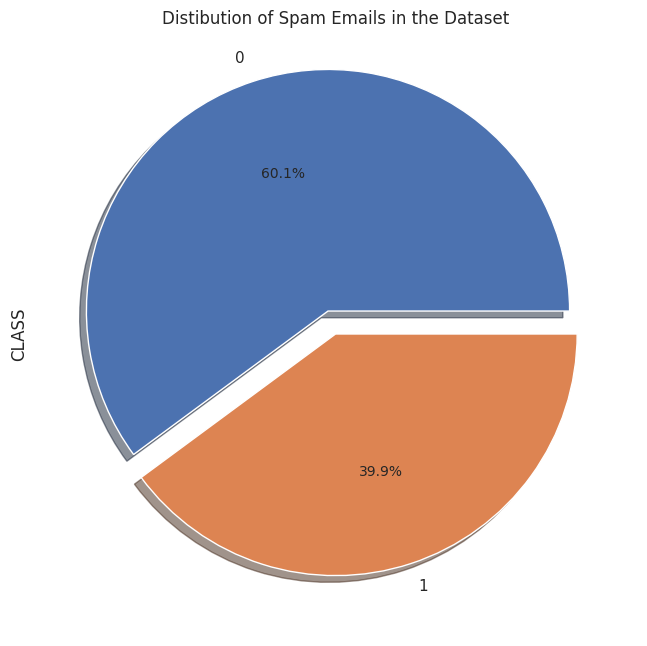

In [33]:
plt.figure(figsize=(12,8), dpi=100)
explode= (0.1,0)
df.CLASS.value_counts().plot(kind='pie',explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Distibution of Spam Emails in the Dataset');

Around 40% of the emails in the dataset are Spam

In [34]:
df.head()

,WORD_FREQ_MAKE,WORD_FREQ_ADDRESS,WORD_FREQ_ALL,WORD_FREQ_3D,WORD_FREQ_OUR,WORD_FREQ_OVER,WORD_FREQ_REMOVE,WORD_FREQ_INTERNET,WORD_FREQ_ORDER,WORD_FREQ_MAIL,WORD_FREQ_RECEIVE,WORD_FREQ_WILL,WORD_FREQ_PEOPLE,WORD_FREQ_REPORT,WORD_FREQ_ADDRESSES,WORD_FREQ_FREE,WORD_FREQ_BUSINESS,WORD_FREQ_EMAIL,WORD_FREQ_YOU,WORD_FREQ_CREDIT,WORD_FREQ_YOUR,WORD_FREQ_FONT,WORD_FREQ_000,WORD_FREQ_MONEY,WORD_FREQ_HP,WORD_FREQ_HPL,WORD_FREQ_GEORGE,WORD_FREQ_650,WORD_FREQ_LAB,WORD_FREQ_LABS,WORD_FREQ_TELNET,WORD_FREQ_857,WORD_FREQ_DATA,WORD_FREQ_415,WORD_FREQ_85,WORD_FREQ_TECHNOLOGY,WORD_FREQ_1999,WORD_FREQ_PARTS,WORD_FREQ_PM,WORD_FREQ_DIRECT,WORD_FREQ_CS,WORD_FREQ_MEETING,WORD_FREQ_ORIGINAL,WORD_FREQ_PROJECT,WORD_FREQ_RE,WORD_FREQ_EDU,WORD_FREQ_TABLE,WORD_FREQ_CONFERENCE,CHAR_FREQ_,CHAR_FREQ_.1,CHAR_FREQ_.2,CHAR_FREQ_.3,CHAR_FREQ_.4,CHAR_FREQ_.5,CAPITAL_RUN_LENGTH_AVERAGE,CAPITAL_RUN_LENGTH_LONGEST,CAPITAL_RUN_LENGTH_TOTAL,CLASS
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
